In [24]:
import math

import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import tpot

In [2]:
mean = pd.read_pickle("../dataset_means_stds/logS_mean.pkl")
std = pd.read_pickle("../dataset_means_stds/logS_std.pkl")
data_train_scaled = pd.read_csv("../scaled_featurized_train/scaled_logS_train.csv", index_col=0)
data_test_scaled = pd.read_csv("../scaled_featurized_test/scaled_logS_test.csv", index_col=0)
data_train = (data_train_scaled * std) + mean
data_test = (data_test_scaled * std) + mean

In [3]:
# features = {}
# features["r1f1"] = lambda df: df["MolLogP"].apply(math.sin)
# features["r1f2"] = lambda df: df["MolLogP"] + df["MolWt"]
# features["r1f3"] = lambda df: df["BalabanJ"] * df["MolMR"]
# features["r1f4"] = lambda df: df["BertzCT"] + df["MolLogP"]
# features["r1f5"] = lambda df: df["NumValenceElectrons"] - df["HeavyAtomCount"]
# features["r1f6"] = lambda df: df["BertzCT"] * df["BalabanJ"]
# features["r1f7"] = lambda df: abs(df["TPSA"] - df["MolLogP"])
# features["r1f8"] = lambda df: df["BertzCT"] - df["NumValenceElectrons"]
# features["r1f9"] = lambda df: abs(df["MolWt"])

# data_train_scaled_sisso = data_train_scaled.copy()
# data_test_scaled_sisso = data_test_scaled.copy()
# for key,fun in features.items():
#     data_train_scaled_sisso[key] = fun(data_train_scaled_sisso)
#     data_test_scaled_sisso[key] = fun(data_test_scaled_sisso)

# data_train_scaled_sisso.head()

In [6]:
model = tpot.TPOTRegressor(
    generations=None,
    population_size=100,
    max_eval_time_mins=1/60,
    max_time_mins=10,
    cv=10,
    verbosity=2,
    scoring="neg_root_mean_squared_error",
    config_dict=tpot.config.regressor_config_dict,
    n_jobs=-1,
    random_state=1234
)

In [7]:
train_x = data_train_scaled.drop(columns="Solubility").to_numpy()
train_y = data_train_scaled.Solubility.to_numpy().ravel()

test_x = data_test_scaled.drop(columns="Solubility").to_numpy()
test_y = data_test_scaled.Solubility.to_numpy().ravel()

model.fit(train_x, train_y)

Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.5415598148431902

Generation 2 - Current best internal CV score: -0.5415598148431902

Generation 3 - Current best internal CV score: -0.5345860421091544

Generation 4 - Current best internal CV score: -0.5345860421091544

Generation 5 - Current best internal CV score: -0.5345860421091544

Generation 6 - Current best internal CV score: -0.5345860421091544

Generation 7 - Current best internal CV score: -0.5341079130929189

Generation 8 - Current best internal CV score: -0.5340776599637935

Generation 9 - Current best internal CV score: -0.5340776599637935

Generation 10 - Current best internal CV score: -0.5340776599637935

Generation 11 - Current best internal CV score: -0.5340776599637935

Generation 12 - Current best internal CV score: -0.5340776599637935

Generation 13 - Current best internal CV score: -0.5340776599637935

Generation 14 - Current best internal CV score: -0.5340776599637935

Generation 15 - Current best internal CV s

TPOTRegressor(config_dict={'sklearn.cluster.FeatureAgglomeration': {'affinity': ['euclidean',
                                                                                 'l1',
                                                                                 'l2',
                                                                                 'manhattan',
                                                                                 'cosine'],
                                                                    'linkage': ['ward',
                                                                                'complete',
                                                                                'average']},
                           'sklearn.decomposition.FastICA': {'tol': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])},
                           'sklearn.decomposition.PCA': {'iter

In [27]:
def unscale(arr):
    return arr * std["Solubility"] + mean["Solubility"]
    
train_pred_y = model.predict(train_x)
test_pred_y = model.predict(test_x)

In [21]:
models = {}

models["r1_1term"] = lambda df: 1.313876535718961e-02 + -1.339440350284874e+00 * df["MolLogP"].apply(math.sin)
models["r1_2term"] = lambda df: 9.901970108755258e-03 + -2.054433417991656e-01 * (df["MolLogP"] + df["MolWt"]) + \
                                -9.837466166023564e-01 * df["MolLogP"].apply(math.sin)
models["r2_1term"] = lambda df:  6.673682610827048e-02 + -1.115267690836167e+00 * ((df["MolLogP"] / df["BalabanJ"]) * df["BalabanJ"].apply(math.sin))

data_train_scaled_sisso = data_train_scaled.copy()
data_test_scaled_sisso = data_test_scaled.copy()
for key,fun in models.items():
    data_train_scaled_sisso[key] = fun(data_train_scaled_sisso)
    data_test_scaled_sisso[key] = fun(data_test_scaled_sisso)

data_train_scaled_sisso.head()

,Solubility,MolWt,MolLogP,MolMR,HeavyAtomCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,...,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT,r1_1term,r1_2term,r2_1term
5005,0.351544,-0.057677,-0.173725,-0.101759,-0.202724,0.161010,-0.756546,0.180909,0.340351,-0.035051,...,-0.335565,-0.426246,-0.944792,0.105107,-0.218159,3.195011,-0.227482,0.244664,0.227485,0.063499
7009,0.538550,-0.330038,-0.096786,-0.249455,-0.288677,-0.745024,0.617037,-0.258902,-0.541047,-0.358764,...,-0.335565,-0.426246,0.305691,-0.074288,-0.379316,0.414804,0.089505,0.142576,0.192655,0.171610
8432,0.702893,0.946787,-1.046428,0.516597,0.656805,1.067043,2.677412,2.160056,0.340351,0.741861,...,-0.335565,-0.426246,-0.319550,2.378998,0.598970,0.945752,0.932516,1.172613,0.881944,1.067424
1575,-1.762260,5.144176,3.949510,6.141466,5.813977,2.577100,1.990621,1.500340,2.808267,6.115500,...,-0.335565,-0.426246,1.556173,2.071607,5.515296,-0.574354,4.017294,0.981353,-1.147234,-4.099812
1668,-1.805061,-0.497527,-0.564416,-1.492669,-1.406064,-1.047035,-0.756546,-0.918617,-0.717327,-1.459389,...,-0.335565,-0.426246,-0.944792,-1.034341,-1.132447,-2.187788,-0.931409,0.729636,0.754300,0.301410


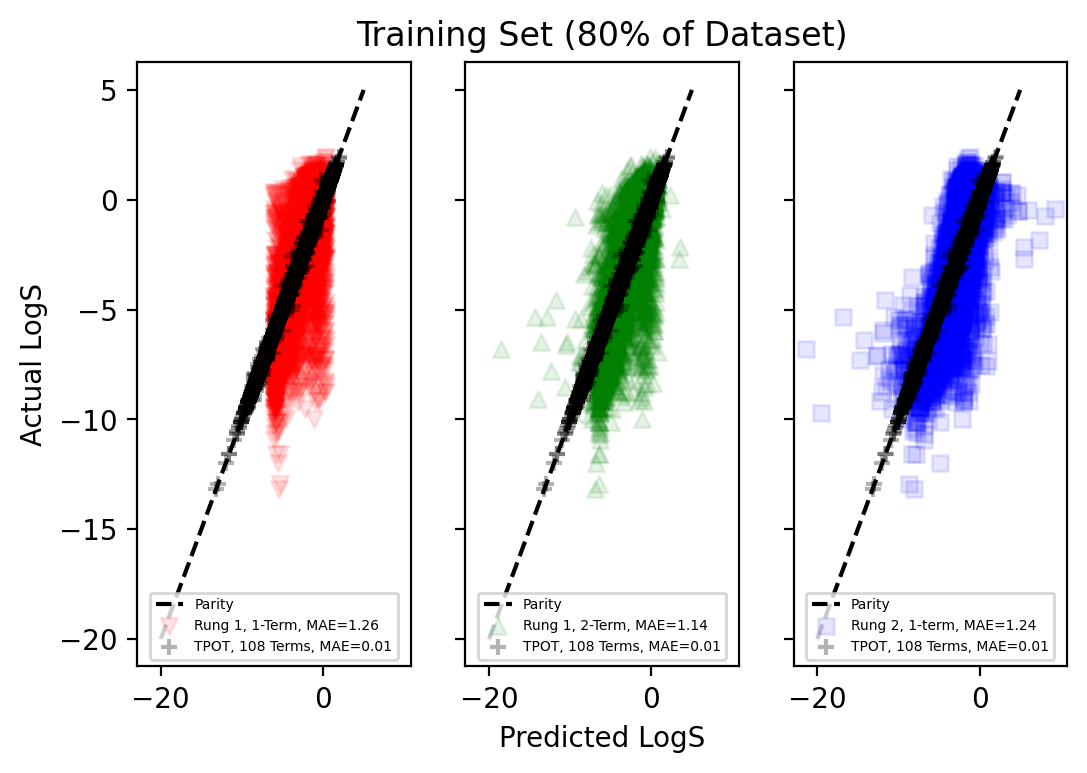

In [88]:
tpot_mape =  np.round(sklearn.metrics.mean_absolute_error(y_true=unscale(train_y), y_pred=unscale(train_pred_y)),2)
r1_1t_mape = np.round(sklearn.metrics.mean_absolute_error(y_true=unscale(train_y), y_pred=unscale(data_train_scaled_sisso["r1_1term"])),2)
r1_2t_mape = np.round(sklearn.metrics.mean_absolute_error(y_true=unscale(train_y), y_pred=unscale(data_train_scaled_sisso["r1_2term"])),2)
r2_1t_mape = np.round(sklearn.metrics.mean_absolute_error(y_true=unscale(train_y), y_pred=unscale(data_train_scaled_sisso["r2_1term"])),2)

plt.rcParams["figure.dpi"]=200
fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharex=True, sharey=True)
ax1.set_ylabel("Actual LogS")
ax2.set_xlabel("Predicted LogS")


    
ax1.scatter(x=unscale(data_train_scaled_sisso["r1_1term"]), y=unscale(train_y), marker="v", color="red",alpha=0.1, label=f"Rung 1, 1-Term, MAE={r1_1t_mape}")
ax2.scatter(x=unscale(data_train_scaled_sisso["r1_2term"]), y=unscale(train_y), marker="^", color="green", alpha=0.1, label=f"Rung 1, 2-Term, MAE={r1_2t_mape}")
ax3.scatter(x=unscale(data_train_scaled_sisso["r2_1term"]), y=unscale(train_y), marker="s", color="blue", alpha=0.1, label=f"Rung 2, 1-term, MAE={r2_1t_mape}")
for ax in (ax1, ax2, ax3):
    ax.scatter(x=unscale(train_pred_y), y=unscale(train_y), color="black", alpha=0.3, marker="+", label=f"TPOT, 108 Terms, MAE={tpot_mape}")
    ax.plot([-20, 5], [-20, 5], color="black", linestyle="--", label="Parity")
    
for ax in (ax1, ax2, ax3):
    ax.legend(prop={"size":5}, loc="lower center")

ax2.set_title("Training Set (80% of Dataset)")
plt.show()

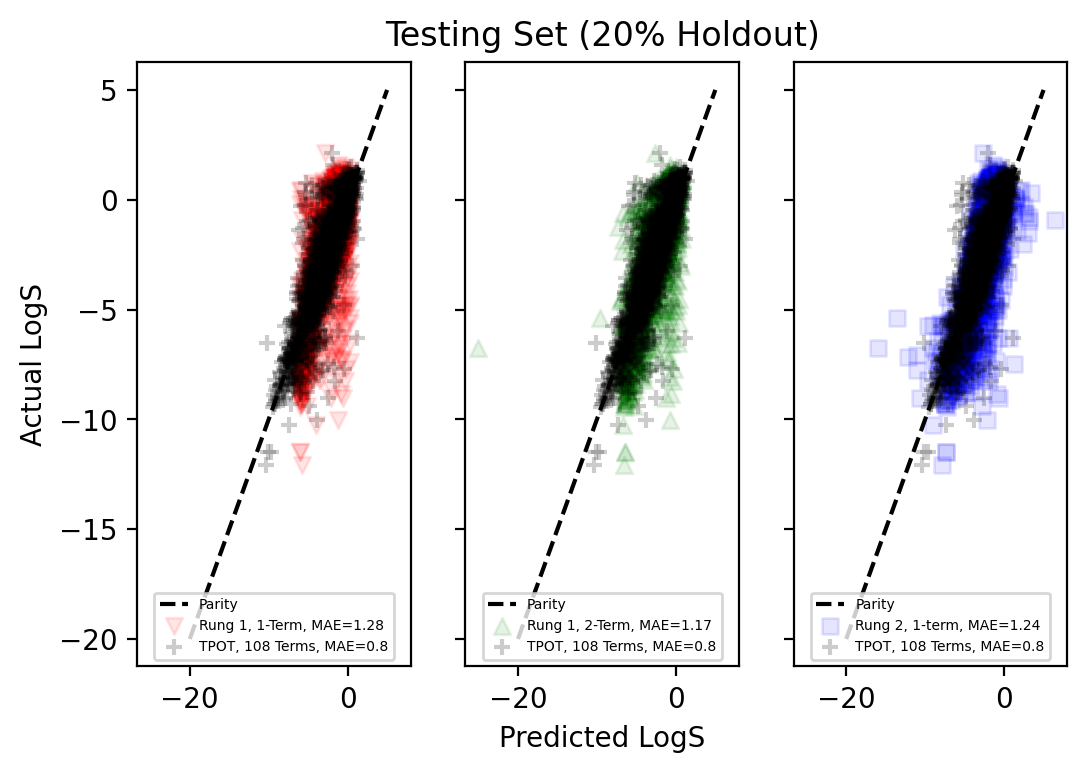

In [87]:
tpot_mape =  np.round(sklearn.metrics.mean_absolute_error(y_true=unscale(test_y), y_pred=unscale(test_pred_y)),2)
r1_1t_mape = np.round(sklearn.metrics.mean_absolute_error(y_true=unscale(test_y), y_pred=unscale(data_test_scaled_sisso["r1_1term"])),2)
r1_2t_mape = np.round(sklearn.metrics.mean_absolute_error(y_true=unscale(test_y), y_pred=unscale(data_test_scaled_sisso["r1_2term"])),2)
r2_1t_mape = np.round(sklearn.metrics.mean_absolute_error(y_true=unscale(test_y), y_pred=unscale(data_test_scaled_sisso["r2_1term"])),2)

plt.rcParams["figure.dpi"]=200
fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharex=True, sharey=True)
ax1.set_ylabel("Actual LogS")
ax2.set_xlabel("Predicted LogS")
 
ax1.scatter(x=unscale(data_test_scaled_sisso["r1_1term"]), y=unscale(test_y), marker="v", color="red",alpha=0.1, label=f"Rung 1, 1-Term, MAE={r1_1t_mape}")
ax2.scatter(x=unscale(data_test_scaled_sisso["r1_2term"]), y=unscale(test_y), marker="^", color="green", alpha=0.1, label=f"Rung 1, 2-Term, MAE={r1_2t_mape}")
ax3.scatter(x=unscale(data_test_scaled_sisso["r2_1term"]), y=unscale(test_y), marker="s", color="blue", alpha=0.1, label=f"Rung 2, 1-term, MAE={r2_1t_mape}")
for ax in (ax1, ax2, ax3):
    ax.scatter(x=unscale(test_pred_y), y=unscale(test_y), color="black", alpha=0.2, marker="+", label=f"TPOT, 108 Terms, MAE={tpot_mape}")
    ax.plot([-20, 5], [-20, 5], color="black", linestyle="--", label="Parity")

ax2.set_title("Testing Set (20% Holdout)")
for ax in (ax1, ax2, ax3):
    ax.legend(prop={"size":5}, loc="lower center")

plt.show()

In [13]:
model.fitted_pipeline_[0].get_support()

14